# PREDICTION OF COVID-19 DISEASE USING ANN

## SIR-F MODEL PLOTTING

In [1]:
%reset -f

In [8]:
pip install --upgrade pip

  Using cached pip-24.0-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-24.0-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 23.3.1
    Uninstalling pip-23.3.1:
      Successfully uninstalled pip-23.3.1
Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install tensorflow[and-cuda]

INFO: pip is looking at multiple versions of tensorflow[and-cuda] to determine which version is compatible with other requirements. This could take a while.
  Using cached nvidia_cublas_cu12-12.2.5.6-py3-none-win_amd64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.2.142-py3-none-win_amd64.whl.metadata (1.6 kB)
  Using cached nvidia_cuda_nvcc_cu12-12.2.140-py3-none-win_amd64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.2.140-py3-none-win_amd64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.2.140-py3-none-win_amd64.whl.metadata (1.5 kB)
  Using cached nvidia_cudnn_cu12-8.9.4.25-py3-none-win_amd64.whl.metadata (1.6 kB)
  Using cached nvidia_cufft_cu12-11.0.8.103-py3-none-win_amd64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.3.141-py3-none-win_amd64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.5.2.141-py3-none-win_amd64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.2.141-py3-none-win_amd6

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-cpu 2.16.1 requires tensorflow-intel==2.16.1; platform_system == "Windows", but you have tensorflow-intel 2.13.1 which is incompatible.


In [10]:
python3 -c "import tensorflow as tf; print(tf.config.list_physical_devices('GPU'))"

SyntaxError: invalid syntax (3998011942.py, line 1)

In [7]:
import tensorflow as tf

ImportError: DLL load failed while importing _pywrap_tf2: A dynamic link library (DLL) initialization routine failed.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Global variables

In [3]:
## Total number of population in Malaysia in 2023
totalPopulation = 34308525

## number of days
T = 100


## Mathematical Model of SIR-F

### 1) SIR-F MODEL

* $\mathrm{S}$: Susceptible = ( Population - Confirmed)
* $\mathrm{I}$: Infected = ( Confirmed - Recovered - Fatal)
* $\mathrm{R}$: Recovered
* $\mathrm{F}$: Fatal

Model:  
\begin{align*}
\mathrm{S} \overset{\beta}{\longrightarrow}\ & \mathrm{I} \overset{\gamma}{\longrightarrow} \mathrm{R}  \\
& \mathrm{I} \overset{\delta}{\longrightarrow} \mathrm{F}  \\
\end{align*}

- $\alpha$: Mortality rate [1/min]
- $\beta$: Effective contact rate [1/min]
- $\gamma$: Recovery rate [1/min]

Ordinary Differential Equation (ODE):

\begin{align*}
& \frac{\mathrm{d}S}{\mathrm{d}t}= - \frac{\beta S I}{N}  \\
& \frac{\mathrm{d}I}{\mathrm{d}t}= \frac{\beta S I}{N} - (\gamma + \alpha) I  \\
& \frac{\mathrm{d}R}{\mathrm{d}t}= \gamma I  \\
& \frac{\mathrm{d}F}{\mathrm{d}t}= \alpha I  \\
\end{align*}


The virus' reproduction rate is $$\mathcal{R}_0 = \frac{\beta}{\gamma + \alpha}$$

Where $N=S+I+R$ is the total population, $t$ is the elapsed time from the start date.

After some time, considering the number of fatality increasing but never make it to the hospital, thus the model expanded:

#### The derived ODE become:

\begin{align*}
& \frac{\mathrm{d}S}{\mathrm{d}t}= - \frac{\beta S I}{N} \\
& \frac{\mathrm{d}I}{\mathrm{d}t}= \frac{(1-\alpha1) \beta S I}{N} - (\gamma + \alpha2) I \\
& \frac{\mathrm{d}R}{\mathrm{d}t}= \gamma I \\
& \frac{\mathrm{d}F}{\mathrm{d}t}= \frac{\alpha1 . \beta S I}{N} - \alpha2 . I \\
\end{align*}

where: $α1$ = mortality rate of $S*$ , $α2$ = mortality rate of $I$ and now total population become $N=S+I+R+F$.

#### The virus' reproduction rate

By focusing on the number of infected, we find

$$\mathcal{R}_0 = \frac{\beta*(1-\alpha1)}{\gamma + \alpha2}$$

indicates,
 - $\mathcal{R}_0 > 1$, spread of the epidemic
 - $\mathcal{R}_0 \leq 1$, the epidemic will stop after a while


### 2) Implementation of the model and presenting results

In [4]:
def modelSIRF(X0, beta, gamma, alpha1, alpha2, T, stepCount):

    def func(X):
        N = np.sum(X)
        f1 = -beta*X[0]*X[1]/N 
        f2 = (1-alpha1)*beta*X[0]*X[1]/N - (gamma+alpha2)*X[1]
        f3 = gamma*X[1] 
        f4 = alpha1*beta*X[0]*X[1]/N - alpha2*X[1]
        return np.array([f1, f2, f3, f4])

    h = T / stepCount
    Xvals = [list(X0)]

    X = X0.copy()
    for n in range(stepCount):
        k1 = func(X)
        k2 = func(X + h*k1/2.0)
        k3 = func(X + h*k2/2.0)
        k4 = func(X + h*k3)

        X += h * (k1 + 2*k2 + 2*k3 + k4) / 6.0
        Xvals.append(list(X))                   

    return np.stack(Xvals)


## display the model
def plotSIRF(Xvals, ax, title, time=T, show=[0,1,2,3,4]):
    stepCount = Xvals.shape[0] - 1
    t = np.linspace(0, time, stepCount+1)
    PopTot = np.sum(Xvals, axis=1)

    if 0 in show or show is None:
        ax.plot(t, Xvals[:,0], label="Susceptibles", c='g')
    if 1 in show or show is None:
        ax.plot(t, Xvals[:,1], label="Infected", c='r')
    if 2 in show or show is None:
        ax.plot(t, Xvals[:,2], label="Recovered", c='b')
    if 3 in show or show is None:
        ax.plot(t, Xvals[:,3], label="Fatal", c='orange')
    if 4 in show or show is None:
        ax.plot(t, PopTot, label="Total Population", c="k")

    ax.set_xlabel("Days")
    ax.set_ylabel("Population")
    ax.set_title(title, y=1.02, size="xx-large")

    ax.legend()
    plt.tight_layout()


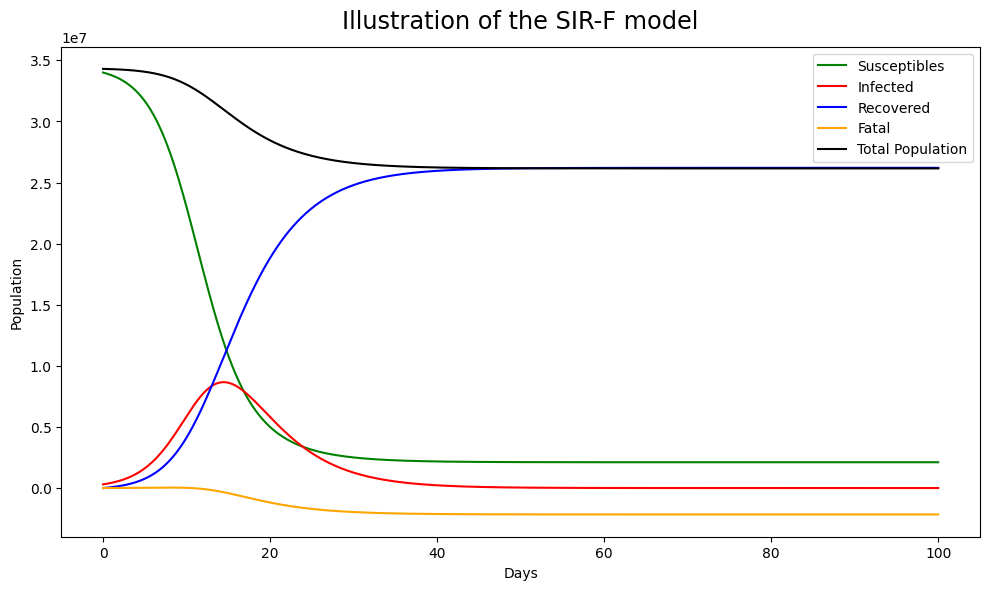

In [5]:
## Parameters for the SIR-F model
S0, I0, R0, F0 = totalPopulation-3e5, 3e5, 0, 0
beta = 0.615
gamma = 0.193
alpha1 = 0.06
alpha2 = 0.03
stepCount = 1000  # Define the stepCount here

## Simulation over 100 days
Time = 100

X0 = np.array([S0, I0, R0, F0])
modelParams = {"X0":X0, "beta":beta, "gamma":gamma, "alpha1":alpha1, "alpha2":alpha2, "T":Time, "stepCount":stepCount}

Xvals = modelSIRF(**modelParams)
# print(Xvals.shape)

fig, ax = plt.subplots(1, 1, figsize=(10,6))
plotSIRF(Xvals, ax, time=Time, title="Illustration of the SIR-F model")

# plt.savefig("Images/Simu1.png")

# Import Libraries

In [7]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

import math
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import seed
seed(1)

import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import tensorflow as tf

from tensorflow.python.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.python.keras.models import Sequential
from scikeras.wrappers import KerasClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
# from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import sklearn

ImportError: DLL load failed while importing _pywrap_tf2: A dynamic link library (DLL) initialization routine failed.

In [8]:
import tensorflow as tf
print(tf.__version__)

ImportError: DLL load failed while importing _pywrap_tf2: A dynamic link library (DLL) initialization routine failed.

# Read and Load Past Data

Data collected from Ministry of Health (MoH) of Malaysia https://github.com/MoH-Malaysia/covid19-public/tree/main

In [39]:
import pandas as pd

file_path = r'C:\Users\User\Downloads\covid data\cases_malaysia.csv'

# Reading the csv file
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
print(df.tail())


           date  susceptible  infected  recovered  fatal  total population   
361  28/12/2023     34300548      3425       4549      3          34308525  \
362  29/12/2023     34300803      3484       4237      1          34308525   
363  30/12/2023     34302229      2803       3488      5          34308525   
364  31/12/2023     34302922      2317       3285      1          34308525   
365    1/1/2024     34304241      1956       2324      4          34308525   

     confirmed  
361       7977  
362       7722  
363       6296  
364       5603  
365       4284  


# Create Training Data, Validating Data and Forecasting Data

In [40]:
# create training data
train_data = df.loc[0:250]
train_data.tail()

,date,susceptible,infected,recovered,fatal,total population,confirmed
246,4/9/2023,34308404,57,63,1,34308525,121
247,5/9/2023,34307481,118,926,0,34308525,1044
248,6/9/2023,34307675,101,748,1,34308525,850
249,7/9/2023,34308326,111,88,0,34308525,199
250,8/9/2023,34308354,108,63,0,34308525,171


In [41]:
# create validating data
valid_data = df.loc[251:len(df):]
valid_data.tail()

,date,susceptible,infected,recovered,fatal,total population,confirmed
361,28/12/2023,34300548,3425,4549,3,34308525,7977
362,29/12/2023,34300803,3484,4237,1,34308525,7722
363,30/12/2023,34302229,2803,3488,5,34308525,6296
364,31/12/2023,34302922,2317,3285,1,34308525,5603
365,1/1/2024,34304241,1956,2324,4,34308525,4284


# Separate Data to X and Y Variable

In [42]:
x_train = train_data[['susceptible','infected','recovered','fatal']]
x_train.tail()

,susceptible,infected,recovered,fatal
246,34308404,57,63,1
247,34307481,118,926,0
248,34307675,101,748,1
249,34308326,111,88,0
250,34308354,108,63,0


In [43]:
# separate training data to Y variable
y_train = train_data[['fatal']]
y_train.tail()

,fatal
246,1
247,0
248,1
249,0
250,0


In [44]:
# separate validating data to X variable
x_valid = valid_data[['susceptible','infected','recovered','fatal']]
x_valid.tail()

,susceptible,infected,recovered,fatal
361,34300548,3425,4549,3
362,34300803,3484,4237,1
363,34302229,2803,3488,5
364,34302922,2317,3285,1
365,34304241,1956,2324,4


In [45]:
# separate validating data to Y variable
y_valid = valid_data[['fatal']]
y_valid.tail()

,fatal
361,3
362,1
363,5
364,1
365,4


# Prediction using Neural Networks

In [46]:
# scaling data using MinMaxScaler
y_train=np.reshape(y_train, (-1,1))
y_valid=np.reshape(y_valid, (-1,1))

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

print(scaler_x.fit(x_train))
x_train_scale=scaler_x.transform(x_train)

print(scaler_x.fit(x_valid))
x_valid_scale=scaler_x.transform(x_valid)

print(scaler_y.fit(y_train))
y_train_scale=scaler_y.transform(y_train)

print(scaler_y.fit(y_valid))
y_valid_scale=scaler_y.transform(y_valid)

MinMaxScaler()
MinMaxScaler()
MinMaxScaler()
MinMaxScaler()


In [47]:
# number of features
num_features = 4
print('num of features = {0:1d}'.format(num_features))

# determining input neurons
input_neurons = num_features
print('input neurons = {0:1d}'.format(input_neurons))

# length of training data
len_train = len(x_train)
print('length of training data = {0:1d}'.format(len_train))

# determining factor (freely specify the number range from 1 to 10)
factor = 1

# determining output neurons
output_neurons = 1
print('output neurons = {0:1d}'.format(output_neurons))

# determining hidden neurons
hidden_neurons = int(len_train/factor) * (input_neurons + output_neurons)
print('hidden neurons = {0:1d}'.format(hidden_neurons))

num of features = 4
input neurons = 4
length of training data = 251
output neurons = 1
hidden neurons = 1255


In [48]:
# create a neural network sequential model
model = Sequential()
model.add(Dense(input_neurons, input_dim=input_neurons, kernel_initializer='normal', activation='relu'))
model.add(Dense(hidden_neurons, activation='relu'))
model.add(Dense(output_neurons, activation='linear'))
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_10 (Dense)             (None, 1255)              6275      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 1256      
Total params: 7,551
Trainable params: 7,551
Non-trainable params: 0
_________________________________________________________________
None


In [49]:
# compiling model
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
history=model.fit(x_train_scale, y_train_scale, epochs=10, batch_size=150, verbose=1, validation_split=0.2)

Train on 200 samples, validate on 51 samples
Epoch 1/10
150/200 [=====================>........] - ETA: 0s - loss: 0.0731 - mean_squared_error: 0.0731 - mean_absolute_error: 0.1691

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\keras\engine\training.py:2456: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


200/200 [==============================] - 0s 2ms/sample - loss: 0.0698 - mean_squared_error: 0.0698 - mean_absolute_error: 0.1690 - val_loss: 0.0025 - val_mean_squared_error: 0.0025 - val_mean_absolute_error: 0.0493
Epoch 2/10
200/200 [==============================] - 0s 192us/sample - loss: 0.0575 - mean_squared_error: 0.0575 - mean_absolute_error: 0.1609 - val_loss: 0.0071 - val_mean_squared_error: 0.0071 - val_mean_absolute_error: 0.0803
Epoch 3/10
200/200 [==============================] - 0s 151us/sample - loss: 0.0489 - mean_squared_error: 0.0489 - mean_absolute_error: 0.1517 - val_loss: 0.0161 - val_mean_squared_error: 0.0161 - val_mean_absolute_error: 0.1200
Epoch 4/10
200/200 [==============================] - 0s 196us/sample - loss: 0.0441 - mean_squared_error: 0.0441 - mean_absolute_error: 0.1547 - val_loss: 0.0286 - val_mean_squared_error: 0.0286 - val_mean_absolute_error: 0.1640
Epoch 5/10
200/200 [==============================] - 0s 123us/sample - loss: 0.0441 - mean_s

dict_keys(['loss', 'mean_squared_error', 'mean_absolute_error', 'val_loss', 'val_mean_squared_error', 'val_mean_absolute_error'])


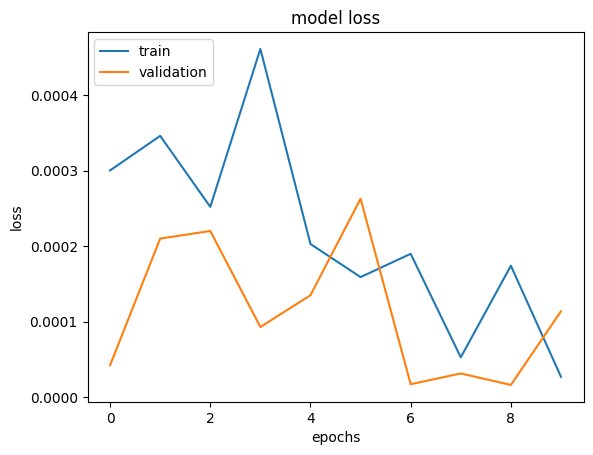

In [31]:
print(history.history.keys())
# plotting loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [36]:
model.save('model.keras')
save_model(model, 'trained_ann_model.h5')

C:\Users\User\AppData\Local\Temp\ipykernel_3244\117480915.py:2: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model, 'trained_ann_model.h5')


FailedPreconditionError: Graph execution error:

Detected at node 'dense_6/kernel/Read/ReadVariableOp' defined at (most recent call last):
    File "<frozen runpy>", line 198, in _run_module_as_main
    File "<frozen runpy>", line 88, in _run_code
    File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\traitlets\config\application.py", line 1043, in launch_instance
      app.start()
    File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelapp.py", line 725, in start
      self.io_loop.start()
    File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 607, in run_forever
      self._run_once()
    File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 1922, in _run_once
      handle._run()
    File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 409, in dispatch_shell
      await result
    File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3006, in run_cell
      result = self._run_cell(
    File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3061, in _run_cell
      result = runner(coro)
    File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3266, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3445, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3505, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\User\AppData\Local\Temp\ipykernel_3244\883271036.py", line 3, in <module>
      model.add(Dense(input_neurons, input_dim=input_neurons, kernel_initializer='normal', activation='relu'))
    File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\keras\engine\sequential.py", line 212, in add
      layer(x)
    File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py", line 765, in __call__
      self._maybe_build(inputs)
    File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py", line 2089, in _maybe_build
      self.build(input_shapes)
    File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\keras\layers\core.py", line 1188, in build
      self.kernel = self.add_weight(
    File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py", line 443, in add_weight
      variable = self._add_variable_with_custom_getter(
    File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\keras\engine\base_layer_utils.py", line 128, in make_variable
      return variable_v1.VariableV1(
Node: 'dense_6/kernel/Read/ReadVariableOp'
Could not find variable dense_6/kernel. This could mean that the variable has been deleted. In TF1, it can also mean the variable is uninitialized. Debug info: container=localhost, status error message=Container localhost does not exist. (Could not find resource: localhost/dense_6/kernel)
	 [[{{node dense_6/kernel/Read/ReadVariableOp}}]]

Original stack trace for 'dense_6/kernel/Read/ReadVariableOp':
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\traitlets\config\application.py", line 1043, in launch_instance
    app.start()
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelapp.py", line 725, in start
    self.io_loop.start()
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\tornado\platform\asyncio.py", line 215, in start
    self.asyncio_loop.run_forever()
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 607, in run_forever
    self._run_once()
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 1922, in _run_once
    handle._run()
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 513, in dispatch_queue
    await self.process_one()
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 502, in process_one
    await dispatch(*args)
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 409, in dispatch_shell
    await result
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
    reply_content = await reply_content
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\ipkernel.py", line 422, in do_execute
    res = shell.run_cell(
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\zmqshell.py", line 540, in run_cell
    return super().run_cell(*args, **kwargs)
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3006, in run_cell
    result = self._run_cell(
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3061, in _run_cell
    result = runner(coro)
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
    coro.send(None)
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3266, in run_cell_async
    has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3445, in run_ast_nodes
    if await self.run_code(code, result, async_=asy):
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3505, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\User\AppData\Local\Temp\ipykernel_3244\883271036.py", line 3, in <module>
    model.add(Dense(input_neurons, input_dim=input_neurons, kernel_initializer='normal', activation='relu'))
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\trackable\base.py", line 204, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\keras\engine\sequential.py", line 212, in add
    layer(x)
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py", line 765, in __call__
    self._maybe_build(inputs)
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py", line 2089, in _maybe_build
    self.build(input_shapes)
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\keras\layers\core.py", line 1188, in build
    self.kernel = self.add_weight(
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py", line 443, in add_weight
    variable = self._add_variable_with_custom_getter(
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\trackable\base.py", line 488, in _add_variable_with_custom_getter
    new_variable = getter(
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\keras\engine\base_layer_utils.py", line 128, in make_variable
    return variable_v1.VariableV1(
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\util\traceback_utils.py", line 150, in error_handler
    return fn(*args, **kwargs)
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\ops\variables.py", line 194, in __call__
    variable_call = cls._variable_call(*args, **kwargs)
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\ops\variable_v1.py", line 305, in _variable_call
    return previous_getter(
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\ops\variable_v1.py", line 298, in <lambda>
    previous_getter = lambda **kwargs: default_variable_creator(None, **kwargs)
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\ops\ref_variable.py", line 70, in default_variable_creator
    return resource_variable_ops.ResourceVariable(
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\util\traceback_utils.py", line 150, in error_handler
    return fn(*args, **kwargs)
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\ops\variables.py", line 197, in __call__
    return super(VariableMetaclass, cls).__call__(*args, **kwargs)
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\ops\resource_variable_ops.py", line 1810, in __init__
    self._init_from_args(
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\ops\resource_variable_ops.py", line 2052, in _init_from_args
    value = gen_resource_variable_ops.read_variable_op(handle, dtype)
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\ops\gen_resource_variable_ops.py", line 595, in read_variable_op
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\framework\op_def_library.py", line 795, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\framework\ops.py", line 3381, in _create_op_internal
    ret = Operation.from_node_def(


In [50]:
from tensorflow.keras.models import save_model
save_model(model, 'trained_ann_model.h5')

C:\Users\User\AppData\Local\Temp\ipykernel_3244\2319039850.py:2: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model, 'trained_ann_model.h5')


FailedPreconditionError: Graph execution error:

Detected at node 'dense_10/kernel/Read/ReadVariableOp' defined at (most recent call last):
    File "<frozen runpy>", line 198, in _run_module_as_main
    File "<frozen runpy>", line 88, in _run_code
    File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\traitlets\config\application.py", line 1043, in launch_instance
      app.start()
    File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelapp.py", line 725, in start
      self.io_loop.start()
    File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 607, in run_forever
      self._run_once()
    File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 1922, in _run_once
      handle._run()
    File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 409, in dispatch_shell
      await result
    File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3006, in run_cell
      result = self._run_cell(
    File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3061, in _run_cell
      result = runner(coro)
    File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3266, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3445, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3505, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\User\AppData\Local\Temp\ipykernel_3244\883271036.py", line 4, in <module>
      model.add(Dense(hidden_neurons, activation='relu'))
    File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\keras\engine\sequential.py", line 227, in add
      raise ValueError(SINGLE_LAYER_OUTPUT_ERROR_MSG)
    File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py", line 765, in __call__
      self._maybe_build(inputs)
    File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py", line 2089, in _maybe_build
      # `super.build()`
    File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\keras\layers\core.py", line 1188, in build
      initializer=self.bias_initializer,
    File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py", line 443, in add_weight
      variable = self._add_variable_with_custom_getter(
    File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\keras\engine\base_layer_utils.py", line 128, in make_variable
      initial_value=init_val,
Node: 'dense_10/kernel/Read/ReadVariableOp'
Could not find variable dense_10/kernel. This could mean that the variable has been deleted. In TF1, it can also mean the variable is uninitialized. Debug info: container=localhost, status error message=Container localhost does not exist. (Could not find resource: localhost/dense_10/kernel)
	 [[{{node dense_10/kernel/Read/ReadVariableOp}}]]

Original stack trace for 'dense_10/kernel/Read/ReadVariableOp':
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\traitlets\config\application.py", line 1043, in launch_instance
    app.start()
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelapp.py", line 725, in start
    self.io_loop.start()
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\tornado\platform\asyncio.py", line 215, in start
    self.asyncio_loop.run_forever()
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 607, in run_forever
    self._run_once()
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 1922, in _run_once
    handle._run()
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 513, in dispatch_queue
    await self.process_one()
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 502, in process_one
    await dispatch(*args)
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 409, in dispatch_shell
    await result
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
    reply_content = await reply_content
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\ipkernel.py", line 422, in do_execute
    res = shell.run_cell(
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\zmqshell.py", line 540, in run_cell
    return super().run_cell(*args, **kwargs)
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3006, in run_cell
    result = self._run_cell(
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3061, in _run_cell
    result = runner(coro)
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
    coro.send(None)
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3266, in run_cell_async
    has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3445, in run_ast_nodes
    if await self.run_code(code, result, async_=asy):
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3505, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\User\AppData\Local\Temp\ipykernel_3244\883271036.py", line 4, in <module>
    model.add(Dense(hidden_neurons, activation='relu'))
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\trackable\base.py", line 204, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\keras\engine\sequential.py", line 227, in add
    raise ValueError(SINGLE_LAYER_OUTPUT_ERROR_MSG)
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py", line 765, in __call__
    self._maybe_build(inputs)
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py", line 2089, in _maybe_build
    # `super.build()`
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\keras\layers\core.py", line 1188, in build
    initializer=self.bias_initializer,
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py", line 443, in add_weight
    variable = self._add_variable_with_custom_getter(
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\trackable\base.py", line 488, in _add_variable_with_custom_getter
    # custom getter interrupts this process by overwriting the initializer,
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\keras\engine\base_layer_utils.py", line 128, in make_variable
    initial_value=init_val,
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\util\traceback_utils.py", line 150, in error_handler
    return fn(*args, **kwargs)
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\ops\variables.py", line 194, in __call__
    @traceback_utils.filter_traceback
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\ops\variable_v1.py", line 305, in _variable_call
    if aggregation is None:
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\ops\variable_v1.py", line 298, in <lambda>
    if cls is not VariableV1:
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\ops\ref_variable.py", line 70, in default_variable_creator
    collections=collections,
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\util\traceback_utils.py", line 150, in error_handler
    return fn(*args, **kwargs)
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\ops\variables.py", line 197, in __call__
    variable_call = cls._variable_call(*args, **kwargs)
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\ops\resource_variable_ops.py", line 1810, in __init__
    if initial_value is not None:
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\ops\resource_variable_ops.py", line 2052, in _init_from_args
    gen_resource_variable_ops.var_is_initialized_op(handle))
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\ops\gen_resource_variable_ops.py", line 595, in read_variable_op
    ```
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\framework\op_def_library.py", line 795, in _apply_op_helper
    # pylint: disable=protected-access
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\framework\ops.py", line 3381, in _create_op_internal
    elif name[-1] == "/":


In [20]:
# Validating data using model to make predictions
y_pred_scale = model.predict(x_valid_scale)

# If the target variable 'y' was scaled during model training, we have to inverse transform the predictions
y_pred = scaler_y.inverse_transform(y_pred_scale)

# Create a DataFrame to compare actual and predicted values
df = pd.DataFrame({'Actual': y_valid.flatten(), 'Predicted': y_pred.flatten()})
df = df.sort_index()

# Display the last few rows of the DataFrame to review the predictions
print(df.tail())



     Actual  Predicted
110       3   3.059360
111       1   1.053460
112       5   5.041235
113       1   1.038097
114       4   4.027984


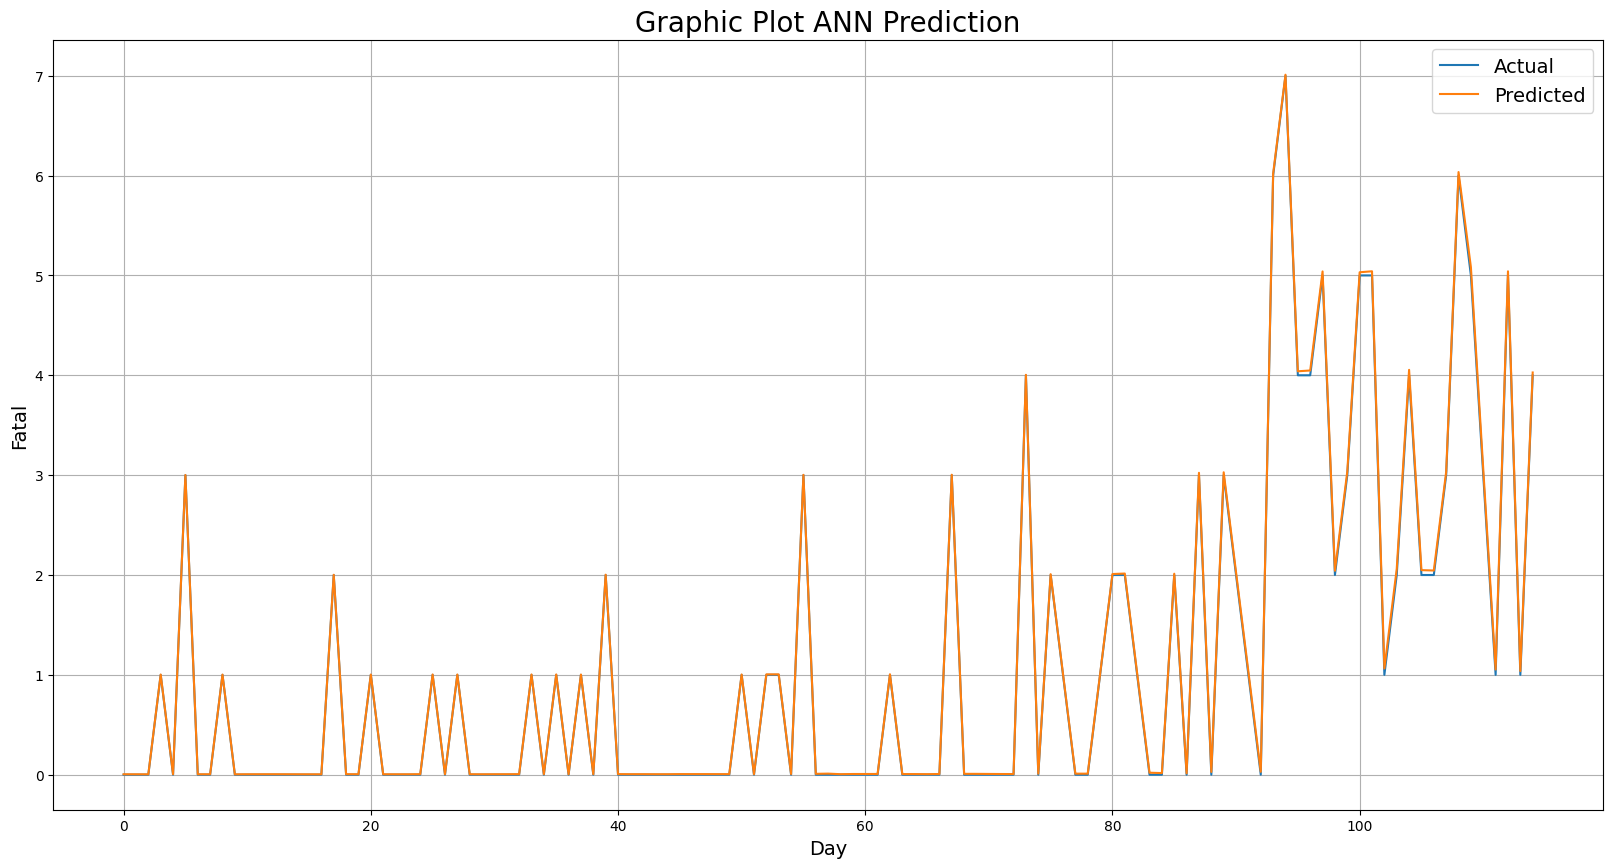

In [21]:
import matplotlib.pyplot as plt

# Plotting both the Actual and Predicted values
df.plot(kind='line', 
        figsize=(20, 10),  # Set the figure size for better readability
        title='Graphic Plot ANN Prediction',  # Chart title
        ylabel='Fatal',  # Y-axis label
        xlabel='Day',  # X-axis label
        )  

# Setting additional plot parameters
plt.title('Graphic Plot ANN Prediction', fontsize=20)  # You can set the font size for the title
plt.ylabel('Fatal', fontsize=14)  # Y-axis label with font size
plt.xlabel('Day', fontsize=14)  # X-axis label with font size
plt.grid(True)  # Adding grid for better readability
plt.legend(['Actual', 'Predicted'], loc='best', fontsize=14)  # Adding legend with font size

# Saving the plot to a file
plt.savefig('ANN-Covid.png')
# Display the plot
plt.show()


# Evaluating Artificial Neural Network

In [22]:
import numpy as np
MAE = mean_absolute_error(y_valid,y_pred)
MSE = mean_squared_error(y_valid,y_pred)
RMSE = np.sqrt(MSE)
MAPE = np.mean(np.abs((np.array(y_valid) - np.array(y_pred)) / np.array(y_valid))) * 100

print('MAE = {0:.4f} '.format(MAE))
print('MSE = {0:.4f} '.format(MSE))
print('RMSE = {0:.4f} '.format(RMSE))
print('MAPE = {0:.4f} '.format(MAPE))

MAE = 0.0145 
MSE = 0.0005 
RMSE = 0.0220 
MAPE = inf 


C:\Users\User\AppData\Local\Temp\ipykernel_3244\2692402987.py:5: RuntimeWarning: divide by zero encountered in divide
  MAPE = np.mean(np.abs((np.array(y_valid) - np.array(y_pred)) / np.array(y_valid))) * 100
